In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

Making Separate Dataset for Training and Testing

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/Dataset/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/Dataset/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

Model Building

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

Compiling the model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the Model

In [ ]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
14/14 [==============================] - 150s 11s/step - loss: 0.4300 - accuracy: 0.7339 - val_loss: 0.2174 - val_accuracy: 0.8843
Epoch 2/10
14/14 [==============================] - 23s 2s/step - loss: 0.1994 - accuracy: 0.9037 - val_loss: 0.0567 - val_accuracy: 0.9835
Epoch 3/10
14/14 [==============================] - 23s 2s/step - loss: 0.2111 - accuracy: 0.9014 - val_loss: 0.0940 - val_accuracy: 0.9835
Epoch 4/10
14/14 [==============================] - 23s 2s/step - loss: 0.1536 - accuracy: 0.9335 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 23s 2s/step - loss: 0.1192 - accuracy: 0.9564 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 23s 2s/step - loss: 0.1265 - accuracy: 0.9564 - val_loss: 0.0633 - val_accuracy: 0.9917
Epoch 7/10
14/14 [==============================] - 23s 2s/step - loss: 0.0969 - accuracy: 0.9725 - val_loss: 0.0238 - val_accuracy: 0.9917
Epoch 8/10
14/14 [

Predictions on Dataset

In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 4s 1s/step


In [ ]:
predictions

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [ ]:
print(len(predictions))

121


Plotting Loss per Iteration

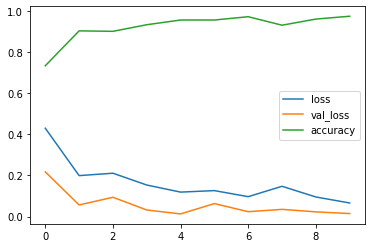

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

Plotting accuracy per Iteration

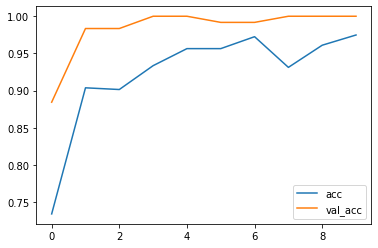

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Making a function to see any image from dataset with predicted label

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("No Fire",fontsize=30)

1/1 [==============================] - 0s 23ms/step
[[1.]]


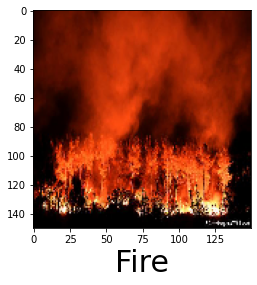

In [ ]:
predictImage("/content/drive/MyDrive/Dataset/test_set/with fire/19464620_401.jpg")

1/1 [==============================] - 0s 25ms/step
[[0.]]


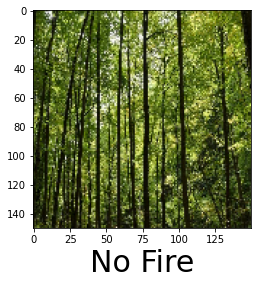

In [ ]:
predictImage('/content/drive/MyDrive/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg')

1/1 [==============================] - 0s 23ms/step
[[1.]]


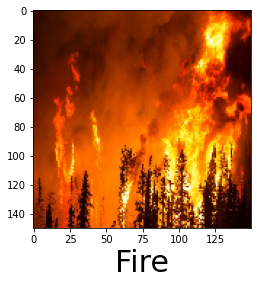

In [ ]:
predictImage('/content/drive/MyDrive/Dataset/train_set/with fire/with fire (101).jpg')

1/1 [==============================] - 0s 22ms/step
[[0.]]


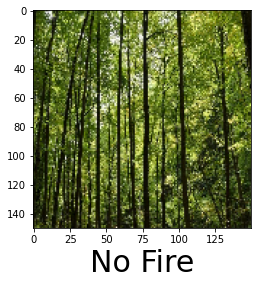

In [ ]:
predictImage('/content/drive/MyDrive/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg')

1/1 [==============================] - 0s 23ms/step
[[1.]]


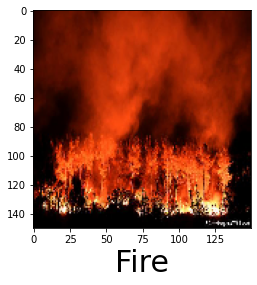

In [ ]:
predictImage('/content/drive/MyDrive/Dataset/test_set/with fire/19464620_401.jpg')